<a href="https://colab.research.google.com/github/sbogde/scikit-regressions-and-confessions/blob/main/week3_05_random_forest_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import make_regression


In [19]:
# Step 1: Generate synthetic regression data
# Creating a dataset with 200 samples and 5 features, adding slight noise
X, y = make_regression(n_samples=200, n_features=5, noise=0.2, random_state=42)

In [20]:
# Step 2: Initialize RandomForestRegressor
# Setting up the model with 100 trees in the forest and a random state
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [21]:
# Step 3: Set up KFold cross-validation
# Using 5 folds for cross-validation to split the data
# Each part will be used once as the validation set while the remaining 4 parts are used for training
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [23]:
# Step 4: Perform cross-validation
# Calculating the cross-validation scores using negative mean squared error as the scoring method
# (We use negative MSE because higher values typically indicate better performance in sklearn metrics)
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')


In [24]:
# Step 5: Convert scores to positive for visualization
# Since the scores are returned as negative (to fit into a "maximize score" framework),
# we convert them to positive MSE values
cv_scores = -cv_scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

In [26]:
# Step 6: Plot cross-validation results
# Plotting the cross-validation MSE for each fold
print("Cross-validation Mean Squared Error scores:", cv_scores)
print("Mean MSE score:", cv_mean)
print("Standard Deviation of MSE scores:", cv_std)

Cross-validation Mean Squared Error scores: [778.86382806 771.06632642 906.62028352 521.22819489 639.97386224]
Mean MSE score: 723.550499025603
Standard Deviation of MSE scores: 131.72033493913457


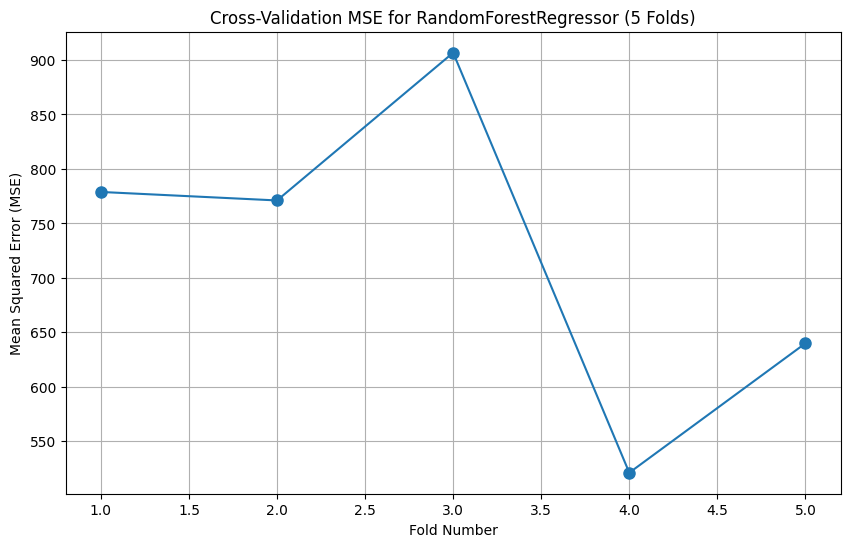

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', markersize=8)
plt.xlabel("Fold Number")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Cross-Validation MSE for RandomForestRegressor (5 Folds)")
plt.grid(True)
plt.show()

In [29]:
# X

In [30]:
import seaborn as sns
import pandas as pd


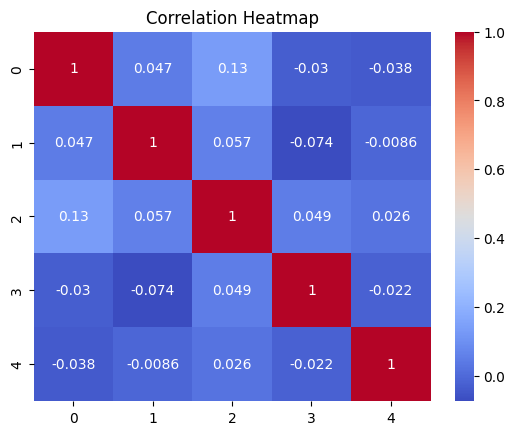

In [37]:
df=pd.DataFrame(X)

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [40]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [42]:
# Create a pandas DataFrame for easier manipulation
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y

# Now you can work with the loaded data in df
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [43]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee